# 0716325 曾正豪

In [40]:
import numpy as np
import sklearn

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Data Generation

## Data Generation
首先，我使用uniform distribution的方式產生出1000個Xi，介於-1.5到1之間  
接著使用np.polyval的函示來計算多項式值，並加上一個normal distribution N(0, 0.25)  
將這1000點畫於圖上

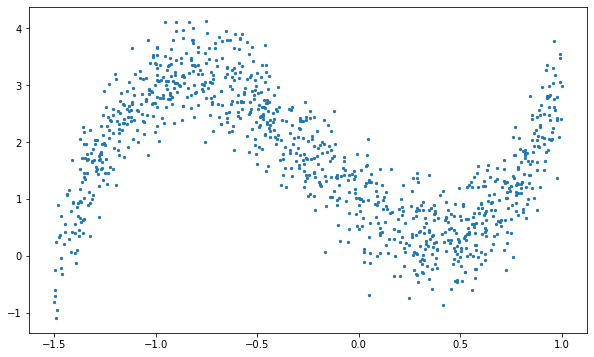

In [41]:
x = np.random.rand(1000) * 2.5 - 1.5
y = np.polyval([3, 2, -3, 1], x) + 0.5 * np.random.randn(1000)
plt.figure(figsize=(10,6))
plt.scatter(x,y, s=5)
plt.show()

## Data Preprocessing
這邊題目要求產生k=[1,4]的polynomial feature，因此我使用了for迴圈來循環產生這4組的polynomial feature並儲存起來

In [42]:
in_x = np.array(x)
in_y = np.array(y)
x = x.reshape((1000,1))
x = np.mat(x)
y = y.reshape((1000,1))
y = np.mat(y)
ploy_feature = []

for i in range(1, 5):
    poly = PolynomialFeatures(i)
    temp = poly.fit_transform(x)
    temp = np.mat(temp)
    ploy_feature.append(temp)

## Model Construction & Results & Bonus

這邊我直接帶入公式，w = $(A^TA)^{-1}A^Tb$ 來計算多項式的係數，並繪製出來

f(x) = -0.63 +1.56×x^1 
f(x) = -0.26 -0.75×x^1 +1.69×x^2 
f(x) = 3.08 +2.02×x^1 -3.06×x^2 +0.99×x^3 
f(x) = -0.04 +3.05×x^1 +2.06×x^2 -3.04×x^3 +0.99×x^4 


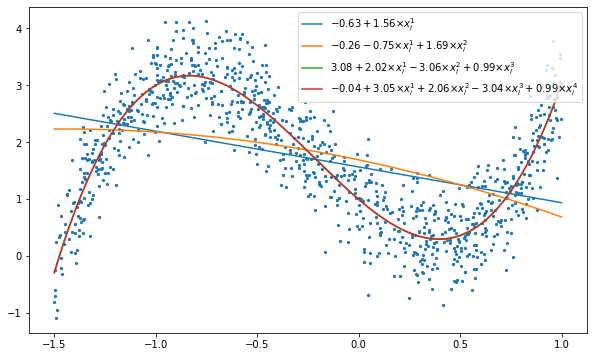

In [52]:
plt.figure(figsize=(10,6))
for i in range(1, 5):
    a = ploy_feature[i-1]
    coeff = (a.T * a).I * (a.T * y)
    coeff = np.array(coeff.T)[0]
    coeff = np.flip(coeff)
    str = "f(x) = %.2f "% (coeff[0])
    legend = "$%.2f"% (coeff[0])
    t = 0
    for i in coeff[1:]:
        t += 1
        if i > 0:
            str += "+"
            legend += "+"
        str += "%.2f×x^%d " % (i, t)
        legend += "%.2f×x^%d_i" % (i, t)
    legend += "$"
    print(str)

    draw_x = np.linspace(-1.5, 1.0, 1000)
    todraw = np.polyval(coeff, draw_x)
    plt.plot(draw_x, todraw, label=legend)
    plt.legend()
plt.scatter(in_x,in_y, s=5)
plt.show()